In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv("/content/weather_2020-11.csv")

df.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [20]:
rows, cols = df.shape
print(f"The dataset is composed of {rows} rows and {cols} columns.")

The dataset is composed of 8364 rows and 3 columns.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            8364 non-null   object
 1   ParameterName   8364 non-null   object
 2   ParameterValue  6229 non-null   object
dtypes: object(3)
memory usage: 196.2+ KB


In [22]:
df.isna().sum()


Time                 0
ParameterName        0
ParameterValue    2135
dtype: int64

In [23]:
df.describe()



,Time,ParameterName,ParameterValue
count,8364,8364,6229
unique,697,12,807
top,2020-11-01T00:00:00Z,TA_PT1H_AVG,3.0
freq,12,697,90


In [31]:
df.dropna(how='any',axis=0)

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
...,...,...,...
8356,2020-11-30T00:00:00Z,WS_PT1H_AVG,1.7
8357,2020-11-30T00:00:00Z,WS_PT1H_MAX,2.2
8358,2020-11-30T00:00:00Z,WS_PT1H_MIN,1.1
8359,2020-11-30T00:00:00Z,WD_PT1H_AVG,138.0


In [34]:
import pandas as pd

# Assuming df is your DataFrame with the provided data

# Convert 'ParameterValue' column to numeric, ignoring non-numeric values
df['ParameterValue'] = pd.to_numeric(df['ParameterValue'], errors='coerce')

# Filter rows for the specified parameters
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PA_PT1H_SUM', 'PRES_PT1H_AVG']
# 'PRES_PT1H_AVG' is for Pressure Average
relevant_data = df[df['ParameterName'].isin(relevant_parameters)]

# Calculate mean values for each parameter
mean_values = relevant_data.groupby('ParameterName')['ParameterValue'].mean()

print("Average values for the parameters:")
print(mean_values)



Average values for the parameters:
ParameterName
RH_PT1H_AVG    87.901387
TA_PT1H_AVG     2.740029
WS_PT1H_AVG     3.900717
Name: ParameterValue, dtype: float64


In [35]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with the provided data

# Convert 'ParameterValue' column to numeric, ignoring non-numeric values
df['ParameterValue'] = pd.to_numeric(df['ParameterValue'], errors='coerce')

# Filter rows for the parameters you're interested in
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PA_PT1H_SUM', 'PRES_PT1H_AVG']
relevant_data = df[df['ParameterName'].isin(relevant_parameters)]

# Pivot the DataFrame to have parameters as columns and hours as rows
pivot_data = relevant_data.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Calculate the minimum, maximum, and median values for each parameter
min_values = np.min(pivot_data, axis=0)
max_values = np.max(pivot_data, axis=0)
median_values = np.median(pivot_data, axis=0)

print("Minimum values for each parameter:")
print(min_values)
print("\nMaximum values for each parameter:")
print(max_values)
print("\nMedian values for each parameter:")
print(median_values)

# Find the hour with the highest value for each parameter
hour_with_highest_value = pivot_data.idxmax()
print("\nHour with the highest value for each parameter:")
print(hour_with_highest_value)


Minimum values for each parameter:
ParameterName
RH_PT1H_AVG    61.0
TA_PT1H_AVG    -8.4
WS_PT1H_AVG     0.4
dtype: float64

Maximum values for each parameter:
ParameterName
RH_PT1H_AVG    100.0
TA_PT1H_AVG     10.9
WS_PT1H_AVG     10.3
dtype: float64

Median values for each parameter:
[nan 2.8 3.7]

Hour with the highest value for each parameter:
ParameterName
RH_PT1H_AVG    2020-11-12T13:00:00Z
TA_PT1H_AVG    2020-11-03T06:00:00Z
WS_PT1H_AVG    2020-11-02T12:00:00Z
dtype: object


In [36]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with the provided data

# Convert 'ParameterValue' column to numeric, ignoring non-numeric values
df['ParameterValue'] = pd.to_numeric(df['ParameterValue'], errors='coerce')

# Filter rows for the parameters you're interested in
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PA_PT1H_SUM', 'PRES_PT1H_AVG']
relevant_data = df[df['ParameterName'].isin(relevant_parameters)]

# Pivot the DataFrame to have parameters as columns and hours as rows
pivot_data = relevant_data.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Calculate the minimum, maximum, and median values for each parameter
min_values = np.min(pivot_data, axis=0)
max_values = np.max(pivot_data, axis=0)
median_values = np.median(pivot_data, axis=0)

print("Minimum values for each parameter:")
print(min_values)
print("\nMaximum values for each parameter:")
print(max_values)
print("\nMedian values for each parameter:")
print(median_values)

# Find the hour with the highest value for each parameter
hour_with_highest_value = pivot_data.idxmax()
print("\nHour with the highest value for each parameter:")
print(hour_with_highest_value)


Minimum values for each parameter:
ParameterName
RH_PT1H_AVG    61.0
TA_PT1H_AVG    -8.4
WS_PT1H_AVG     0.4
dtype: float64

Maximum values for each parameter:
ParameterName
RH_PT1H_AVG    100.0
TA_PT1H_AVG     10.9
WS_PT1H_AVG     10.3
dtype: float64

Median values for each parameter:
[nan 2.8 3.7]

Hour with the highest value for each parameter:
ParameterName
RH_PT1H_AVG    2020-11-12T13:00:00Z
TA_PT1H_AVG    2020-11-03T06:00:00Z
WS_PT1H_AVG    2020-11-02T12:00:00Z
dtype: object


Text(0, 0.5, 'Wind Speed (m/s)')

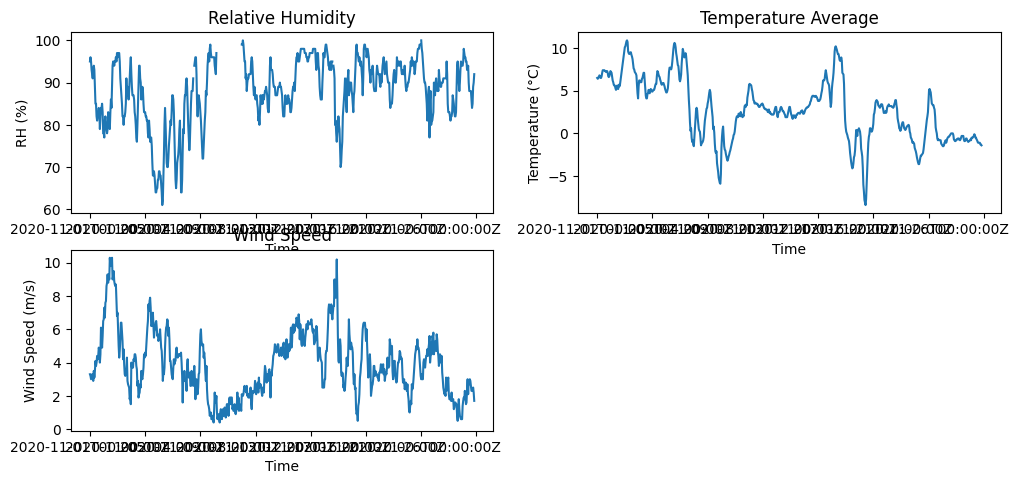

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided data

# Convert 'ParameterValue' column to numeric, ignoring non-numeric values
df['ParameterValue'] = pd.to_numeric(df['ParameterValue'], errors='coerce')

# Filter rows for the parameters you're interested in
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRES_PT1H_AVG']
relevant_data = df[df['ParameterName'].isin(relevant_parameters)]

# Pivot the DataFrame to have parameters as columns and time as rows
pivot_data = relevant_data.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the trends for each parameter
plt.figure(figsize=(12, 8))

# Relative Humidity
plt.subplot(3, 2, 1)
pivot_data['RH_PT1H_AVG'].plot(ax=plt.gca())
plt.title('Relative Humidity')
plt.xlabel('Time')
plt.ylabel('RH (%)')

# Temperature Average
plt.subplot(3, 2, 2)
pivot_data['TA_PT1H_AVG'].plot(ax=plt.gca())
plt.title('Temperature Average')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# Wind Speed
plt.subplot(3, 2, 3)
pivot_data['WS_PT1H_AVG'].plot(ax=plt.gca())
plt.title('Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')


